In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#variable to find non-regular null values and reading csv file
missing_value = ['N/a','na', np.nan]

df = pd.read_csv('banknotes.csv',  na_values=missing_value)

In [3]:
df.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [4]:
df.shape

(200, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [6]:
#statistical information of the dataset
df.describe()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [7]:
#checking for null values
df.isnull().sum()

conterfeit    0
Length        0
Left          0
Right         0
Bottom        0
Top           0
Diagonal      0
dtype: int64

In [8]:
#the minimum conterfeit banknote is 0.0 which means it's original
df.min()

conterfeit      0.0
Length        213.8
Left          129.0
Right         129.0
Bottom          7.2
Top             7.7
Diagonal      137.8
dtype: float64

In [9]:
#the maximum conterfeit banknote is 1.0 which means it's fake
df.max()

conterfeit      1.0
Length        216.3
Left          131.0
Right         131.1
Bottom         12.7
Top            12.3
Diagonal      142.4
dtype: float64

In [10]:
#checking for whitespaces in columns
np.where([df.apply(lambda x: x==' ')])

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [11]:
#checking for whitespaces in data
[i for i in df.columns if i.startswith(' ') or i.endswith(' ')]

[]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conterfeit', ylabel='Density'>

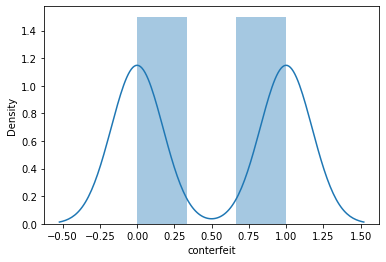

In [12]:
sns.distplot(df['conterfeit'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conterfeit'>

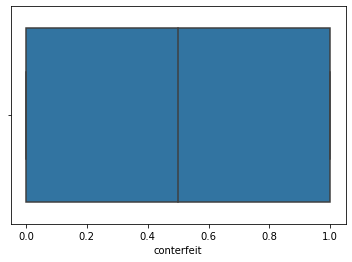

In [13]:
sns.boxplot(df['conterfeit'])

In [14]:
print('conterfeit information of outliers:')
print('Skewness of conterfeit = ', df['conterfeit'].skew())
print('Kurtosis = ',df['conterfeit'].kurt())
Mean = df['conterfeit'].mean()
Median = df['conterfeit'].median()
print('Mean', round(Mean, 2))
print('Median', round(Median, 2))
if Mean >  Median:
    print('conterfeit is rightly skewed')
else:
    print('conterfeit is left skewed')

conterfeit information of outliers:
Skewness of conterfeit =  0.0
Kurtosis =  -2.0203045685279193
Mean 0.5
Median 0.5
conterfeit is left skewed


In [15]:
#function to check for outliers in the entire dataframe
def outlier(vals):
    dict_holder = {}
    for column in vals.columns:
        data = vals[column].to_numpy()
        mean = np.mean(data)
        std = np.std(data)
        threshold_right = 3
        threshold_left = -3
        outlier = []
        for i in data:
            z = (i-mean)/std
            if z > threshold_right or z < threshold_left:
                if i not in outlier:
                    outlier.append(i)
                    dict_holder[column] = outlier
    return dict_holder

In [16]:
outlier(df)

{'Length': [216.3], 'Left': [129.0], 'Top': [7.7]}

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

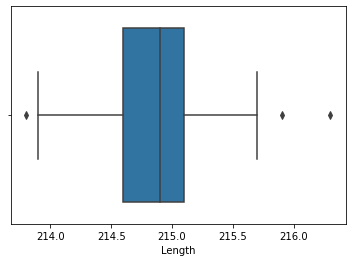

In [17]:
sns.boxplot(df['Length'])

<AxesSubplot:>

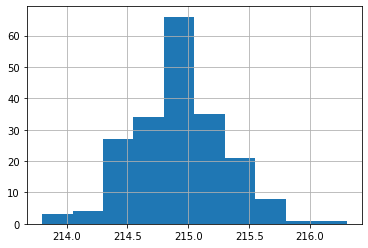

In [18]:
df.Length.hist()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Left'>

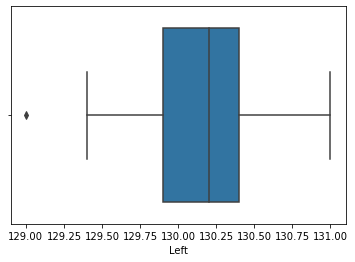

In [19]:
sns.boxplot(df['Left'])

<AxesSubplot:>

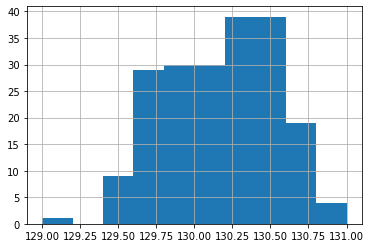

In [20]:
df.Left.hist()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Top'>

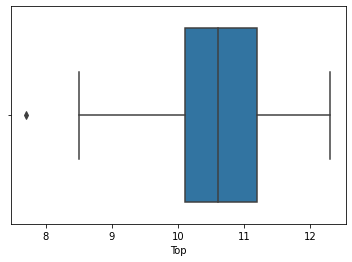

In [21]:
sns.boxplot(df['Top'])

<AxesSubplot:>

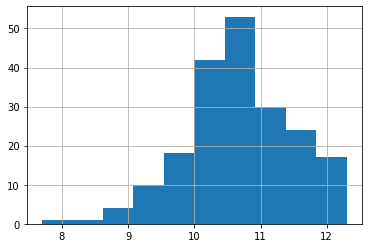

In [22]:
df.Top.hist()

<AxesSubplot:>

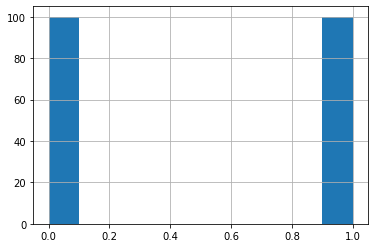

In [23]:
df.conterfeit.hist()

In [24]:
from scipy import stats
from scipy.stats import shapiro
import statistics

In [25]:
integers = df.select_dtypes('number')
integers[:4]

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0


In [26]:
#checking for normality

for i in integers:
    print('FEATURE:', i.upper())
    value = stats.shapiro(df[i])[1]
    if value < 0.05:
        print('Null hypothesis rejected. Data not normal')
    else:
        print('Null hypothesis accepted. Data is normal')

FEATURE: CONTERFEIT
Null hypothesis rejected. Data not normal
FEATURE: LENGTH
Null hypothesis accepted. Data is normal
FEATURE: LEFT
Null hypothesis rejected. Data not normal
FEATURE: RIGHT
Null hypothesis rejected. Data not normal
FEATURE: BOTTOM
Null hypothesis rejected. Data not normal
FEATURE: TOP
Null hypothesis accepted. Data is normal
FEATURE: DIAGONAL
Null hypothesis rejected. Data not normal


In [27]:
#shapiro normal test
tampungan = []
for _ in df.columns:
    tampungan.append(shapiro(df[_])[1])
    print("Sig {} = {}".format(_,shapiro(df[_])[1]))
print("Avg p val:", statistics.mean(tampungan))

Sig conterfeit = 1.997188814918072e-20
Sig Length = 0.05423213168978691
Sig Left = 0.004771236330270767
Sig Right = 0.011772520840168
Sig Bottom = 6.353497497002536e-07
Sig Top = 0.05853283777832985
Sig Diagonal = 6.674262920114415e-08
Avg p val: 0.01847277553299063


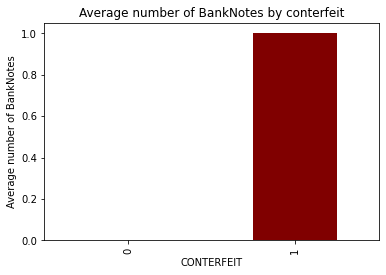

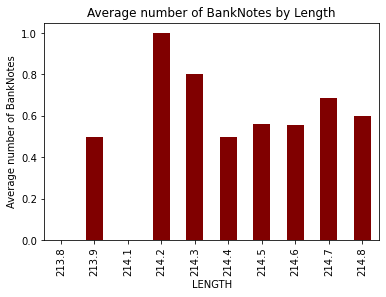

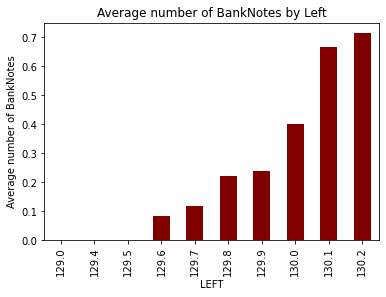

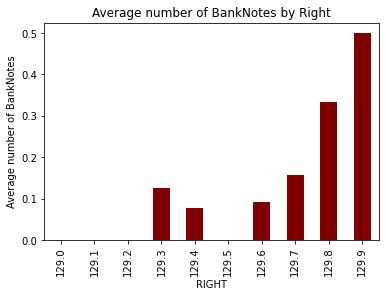

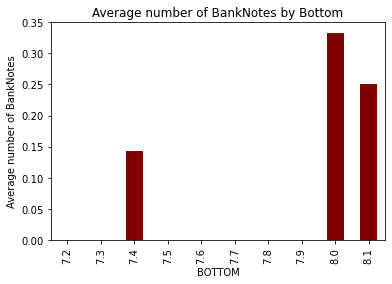

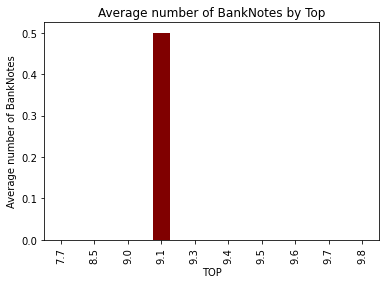

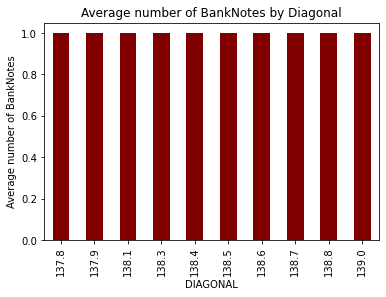

In [28]:
#relationship between features and the target variable

for i in integers.columns:
    plt.figure()
    (df.groupby(i)['conterfeit'].mean()).head(10).plot.bar(color='maroon')
    plt.xlabel(i.upper())
    plt.ylabel('Average number of BankNotes')
    plt.title(f'Average number of BankNotes by {i}');

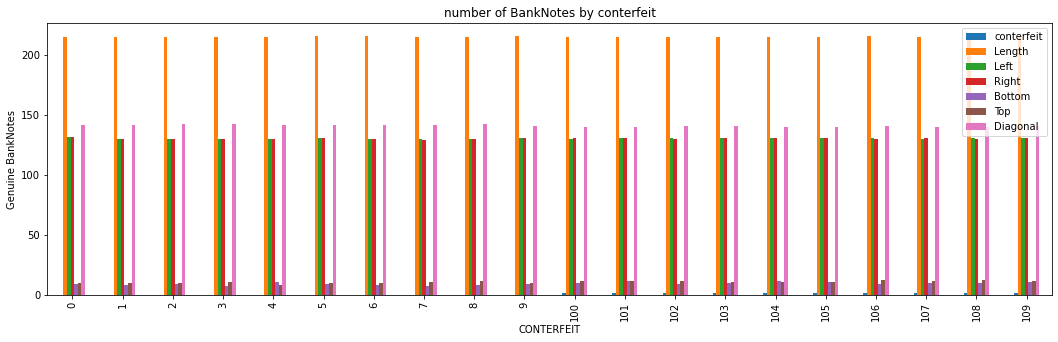

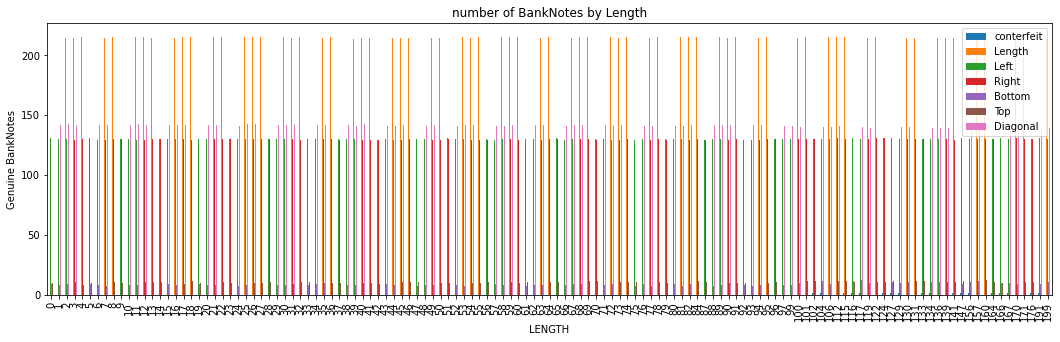

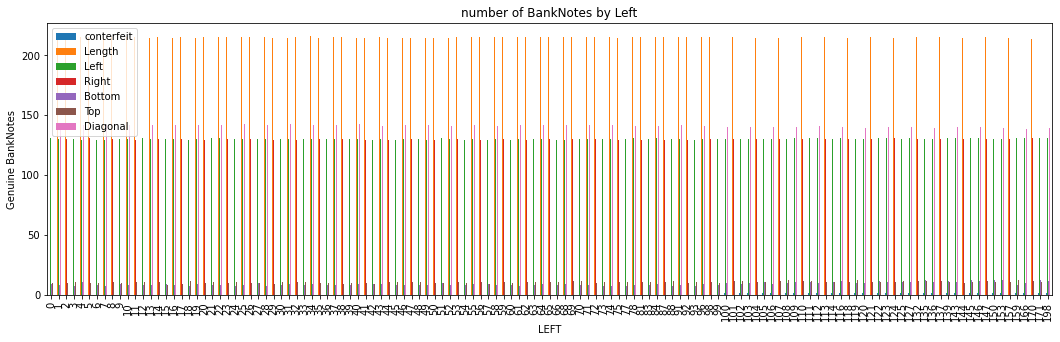

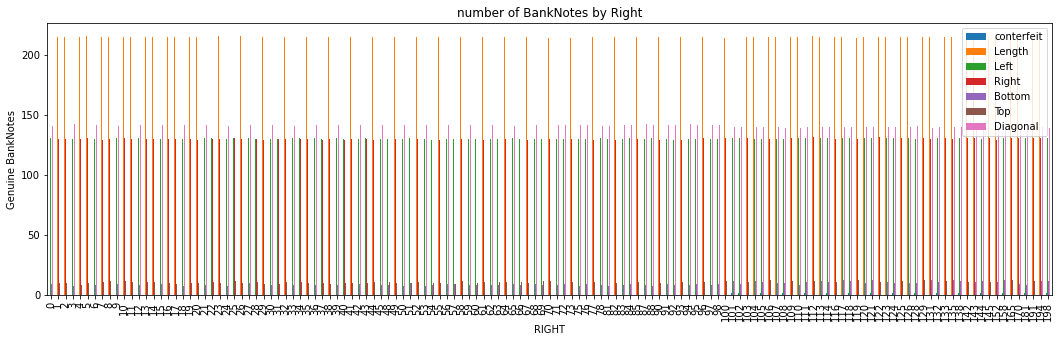

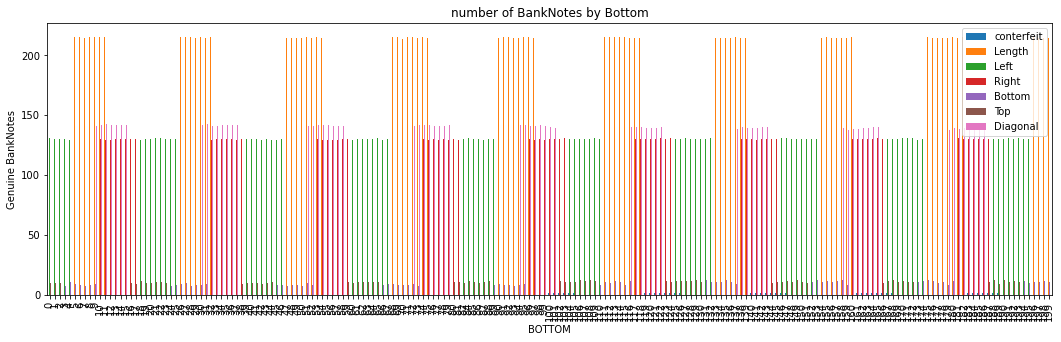

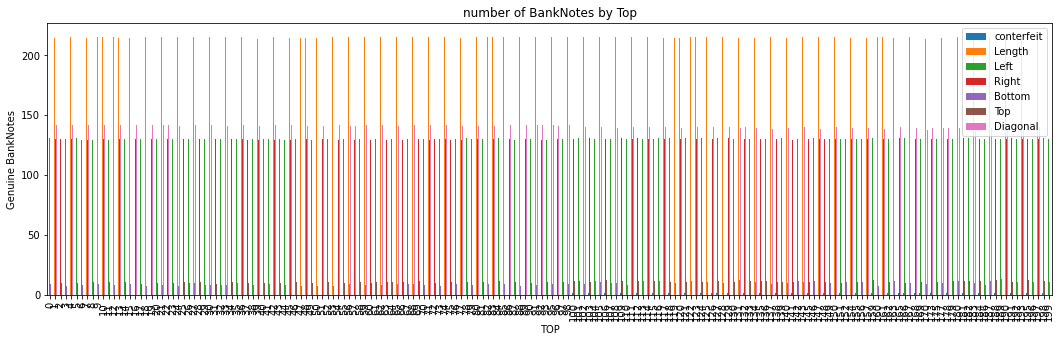

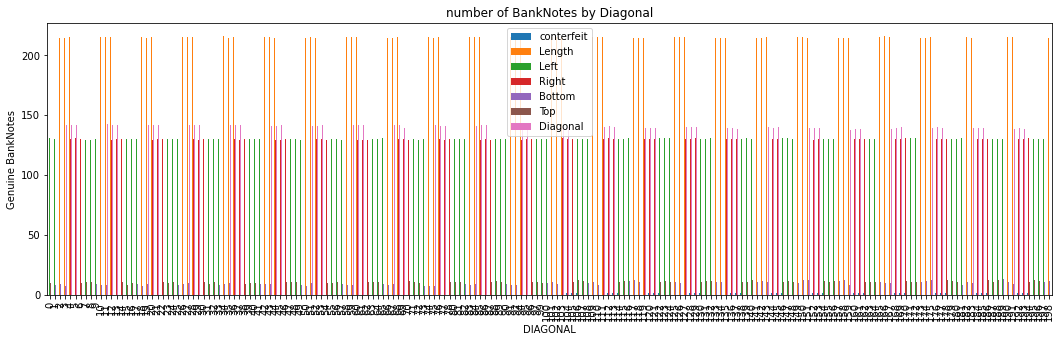

In [29]:
genuine = df[df['conterfeit']== 0]

for i in genuine:
#     plt.figure(figsize=(30,45))
#     plt.figure()
    plt.rcParams['figure.figsize']=18,5
    (df.groupby(i)).head(10).plot.bar()
    plt.xlabel(i.upper())
    plt.ylabel('Genuine BankNotes')
    labels=["Counterfeit", "Length", "Left", "Right", "Bottom", "Top", "July", "Diagonal"]
    plt.title(f'number of BankNotes by {i}');

<AxesSubplot:>

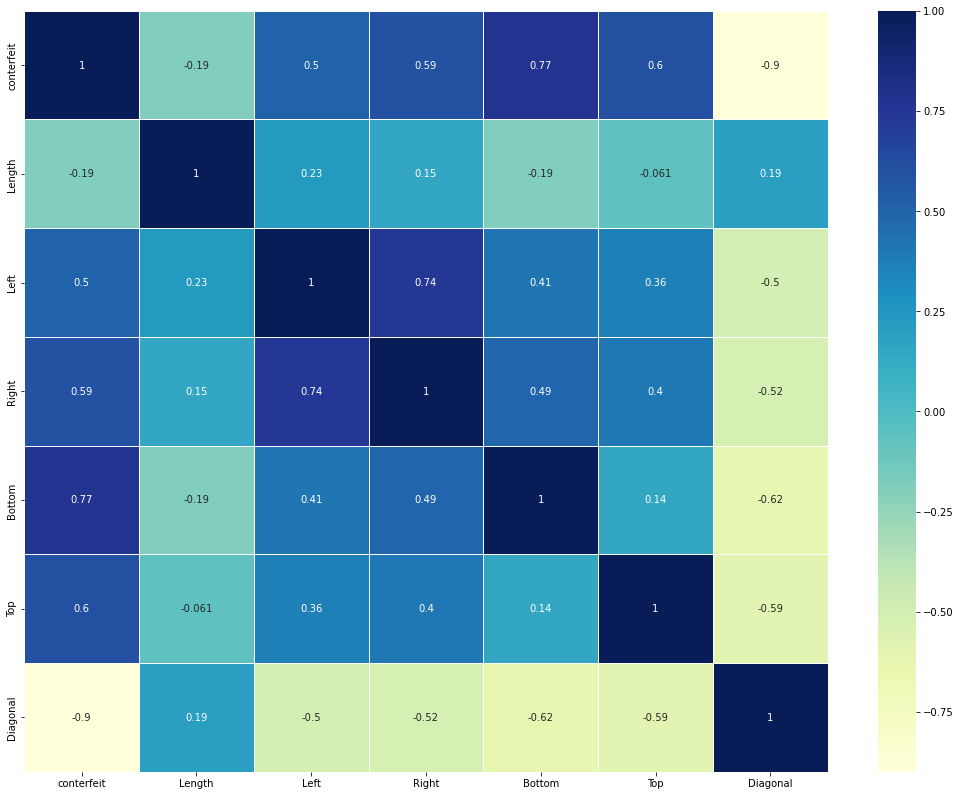

In [30]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), xticklabels = df.columns, yticklabels = df.columns, annot=True,linewidths=0.5, cmap = "YlGnBu")

In [31]:
df['Length'] = [np.log(x) for x in df['Length']]
df['Left'] = [np.log(x) for x in df['Left']]
df['Top'] = [np.log(x) for x in df['Top']]